In [48]:
!pip install xgboost pandas numpy scikit-learn matplotlib seaborn statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 7.9 MB/s eta 0:00:0000:0100:01


In [46]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("heart-attack-risk-prediction-dataset 2.csv")

In [12]:
df.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Heart Attack Risk (Text),Gender,Systolic blood pressure,Diastolic blood pressure
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.0,0.333333,0.0,0.227018,0.048229,0.036512,0,Male,0.600000,0.534884
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,2.0,0.666667,0.0,0.227018,0.048229,0.036512,0,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,4.0,1.000000,0.0,0.227018,0.048229,0.036512,0,Male,0.187097,0.674419
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,1.0,0.500000,0.0,0.227018,0.048229,0.036512,0,Male,0.645161,0.593023
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,1.0,0.166667,0.0,0.227018,0.048229,0.036512,0,Male,0.251613,0.383721


In [ ]:
#From observation, it is apparant that Heart Attack Risk Column contains null values, therefore it should be removed

In [13]:
df.drop(columns=["Heart Attack Risk (Text)"], inplace=True)

In [14]:
df.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.332468,0.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.600000,0.534884
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,0.276623,2.0,0.666667,0.0,0.227018,0.048229,0.036512,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,0.057143,4.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.187097,0.674419
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,0.266234,1.0,0.500000,0.0,0.227018,0.048229,0.036512,Male,0.645161,0.593023
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,0.768831,1.0,0.166667,0.0,0.227018,0.048229,0.036512,Male,0.251613,0.383721


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9651 non-null   float64
 1   Cholesterol                      9651 non-null   float64
 2   Heart rate                       9651 non-null   float64
 3   Diabetes                         9377 non-null   float64
 4   Family History                   9377 non-null   float64
 5   Smoking                          9377 non-null   float64
 6   Obesity                          9377 non-null   float64
 7   Alcohol Consumption              9377 non-null   float64
 8   Exercise Hours Per Week          9651 non-null   float64
 9   Diet                             9651 non-null   int64  
 10  Previous Heart Problems          9377 non-null   float64
 11  Medication Use                   9377 non-null   float64
 12  Stress Level        

In [ ]:
#There are columns such as, 'Diabetes', Family History', 'Obesity','Alcohol Consumption', 'Physical Activity Days Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level'   have some empty values

In [ ]:
#As the data is numerical, we will choose median method to fill in missing values

In [19]:
df = df.fillna({'Diabetes':df['Diabetes'].median(),'Family History':df['Family History'].median(),'Smoking':df['Smoking'].median(),'Obesity':df['Obesity'].median(),'Alcohol Consumption':df['Alcohol Consumption'].median(),'Previous Heart Problems':df['Previous Heart Problems'].median(),'Medication Use':df['Medication Use'].median(),'Stress Level':df['Stress Level'].median(),'Physical Activity Days Per Week':df['Physical Activity Days Per Week'].median()})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9651 non-null   float64
 1   Cholesterol                      9651 non-null   float64
 2   Heart rate                       9651 non-null   float64
 3   Diabetes                         9651 non-null   float64
 4   Family History                   9651 non-null   float64
 5   Smoking                          9651 non-null   float64
 6   Obesity                          9651 non-null   float64
 7   Alcohol Consumption              9651 non-null   float64
 8   Exercise Hours Per Week          9651 non-null   float64
 9   Diet                             9651 non-null   int64  
 10  Previous Heart Problems          9651 non-null   float64
 11  Medication Use                   9651 non-null   float64
 12  Stress Level        

In [21]:
df.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.332468,0.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.600000,0.534884
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,0.276623,2.0,0.666667,0.0,0.227018,0.048229,0.036512,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,0.057143,4.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.187097,0.674419
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,0.266234,1.0,0.500000,0.0,0.227018,0.048229,0.036512,Male,0.645161,0.593023
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,0.768831,1.0,0.166667,0.0,0.227018,0.048229,0.036512,Male,0.251613,0.383721


In [ ]:
#Gender is the only, non-numerical variable so converting it into numerical form is essential

In [22]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9651 non-null   float64
 1   Cholesterol                      9651 non-null   float64
 2   Heart rate                       9651 non-null   float64
 3   Diabetes                         9651 non-null   float64
 4   Family History                   9651 non-null   float64
 5   Smoking                          9651 non-null   float64
 6   Obesity                          9651 non-null   float64
 7   Alcohol Consumption              9651 non-null   float64
 8   Exercise Hours Per Week          9651 non-null   float64
 9   Diet                             9651 non-null   int64  
 10  Previous Heart Problems          9651 non-null   float64
 11  Medication Use                   9651 non-null   float64
 12  Stress Level        

In [25]:
#Heart Attack Risk is the target variable, so definition of features is converted as followed
X = df.drop(columns=["Heart Attack Risk (Binary)"])
y = df["Heart Attack Risk (Binary)"]

In [27]:
#Now, lets split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#XGBoost Library is going to be run, so it is essential that data is converted to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [65]:
#Defining the parameters of xgboost
params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "logloss",  # Loss function
    "max_depth": 4,  # Reduce depth to avoid overfitting
    "learning_rate": 0.1,  # Lower learning rate for stable learning
    "n_estimators": 500,  # More boosting rounds for better learning
    "subsample": 0.8,  # Use 80% of data per tree
    "colsample_bytree": 0.8,  # Use 80% of features per tree
    "min_child_weight": 5,  # Higher value prevents small tree splits
    "alpha": 0.02,  # L1 Regularization (reduces feature weight dominance)
    "lambda": 2,  # L2 Regularization (smooths model weights)
}

In [69]:
xgb_model = xgb.train(
    params, dtrain, num_boost_round=500, evals=[(dtrain, "train"), (dtest, "test")],
    early_stopping_rounds=20, verbose_eval=10
)

[0]	train-logloss:0.64411	test-logloss:0.63525
[10]	train-logloss:0.63144	test-logloss:0.62683
[20]	train-logloss:0.62412	test-logloss:0.62323
[30]	train-logloss:0.61741	test-logloss:0.62145
[40]	train-logloss:0.60885	test-logloss:0.62177
[50]	train-logloss:0.60019	test-logloss:0.62043
[60]	train-logloss:0.59318	test-logloss:0.61943
[70]	train-logloss:0.58597	test-logloss:0.61858
[80]	train-logloss:0.57921	test-logloss:0.61835
[89]	train-logloss:0.57342	test-logloss:0.61828


/opt/homebrew/Caskroom/miniconda/base/envs/demo_project/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [23:46:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


In [70]:
#Train the dataset
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

/opt/homebrew/Caskroom/miniconda/base/envs/demo_project/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:46:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [71]:
#Testing the model and predicting the results
y_pred = xgb_model.predict(dtest)
# Convert probabilities to binary values (0 or 1)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

In [90]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

XGBoost Model Accuracy: 0.6727


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
print("Missing Values in Each Column:\n", X.isna().sum())
print("\nInfinite Values in Each Column:\n", X.replace([np.inf, -np.inf], np.nan).isna().sum())

Missing Values in Each Column:
 Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                             0
Family History                       0
Smoking                              0
Obesity                              0
Alcohol Consumption                  0
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems              0
Medication Use                       0
Stress Level                         0
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week      0
Sleep Hours Per Day                  0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                             274
Systolic blood pressure              0
Diastolic blood pressure        

In [53]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with median
X.fillna(X.median(), inplace=True)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF again
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))


                            Feature        VIF
5                           Smoking  15.060282
19                      Blood sugar   9.028019
24         Diastolic blood pressure   8.530247
23          Systolic blood pressure   7.372849
0                               Age   5.980726
2                        Heart rate   4.905432
12                     Stress Level   4.535721
1                       Cholesterol   3.966578
8           Exercise Hours Per Week   3.955813
13          Sedentary Hours Per Day   3.948161
16                    Triglycerides   3.946451
15                              BMI   3.914568
14                           Income   3.905094
17  Physical Activity Days Per Week   3.332087
18              Sleep Hours Per Day   3.289670
3                          Diabetes   2.906260
7               Alcohol Consumption   2.534952
9                              Diet   2.474817
6                           Obesity   2.047733
11                   Medication Use   1.937222
10          P

In [55]:
#We see that smoking has high multicollinearity, since smoking does not have a correlation more than 0.5 with any values, 
#so we dont need to remove any other variable
X_reduced = X.drop(columns=["Smoking"])

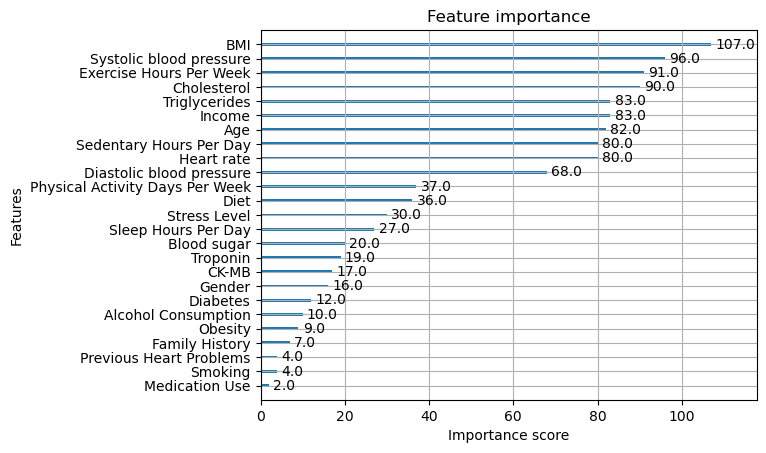

In [73]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()

In [74]:
X_reduced = X.drop(columns=["Medication Use", "Smoking", "Previous Heart Problems", "Obesity", "Family History"])


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))


                            Feature        VIF
5                           Smoking  15.060282
19                      Blood sugar   9.028019
24         Diastolic blood pressure   8.530247
23          Systolic blood pressure   7.372849
0                               Age   5.980726
2                        Heart rate   4.905432
12                     Stress Level   4.535721
1                       Cholesterol   3.966578
8           Exercise Hours Per Week   3.955813
13          Sedentary Hours Per Day   3.948161
16                    Triglycerides   3.946451
15                              BMI   3.914568
14                           Income   3.905094
17  Physical Activity Days Per Week   3.332087
18              Sleep Hours Per Day   3.289670
3                          Diabetes   2.906260
7               Alcohol Consumption   2.534952
9                              Diet   2.474817
6                           Obesity   2.047733
11                   Medication Use   1.937222
10          P

In [76]:
X["Lifestyle_Score"] = X["Exercise Hours Per Week"] - X["Sedentary Hours Per Day"] - X["Stress Level"]
X.drop(columns=["Exercise Hours Per Week", "Sedentary Hours Per Day", "Stress Level"], inplace=True)


In [79]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 4,  # Prevent overfitting
    "learning_rate": 0.1,  # Stable learning
    "n_estimators": 500,  # More boosting rounds for accuracy
    "subsample": 0.8,  # Use 80% of training data per tree
    "colsample_bytree": 0.6,  # Use only 60% of features per tree (avoids dominance of BMI)
    "min_child_weight": 5,  # Prevents overfitting on small patterns
    "alpha": 0.02,  # L1 Regularization (reduces over-reliance on dominant features)
    "lambda": 2,  # L2 Regularization
}


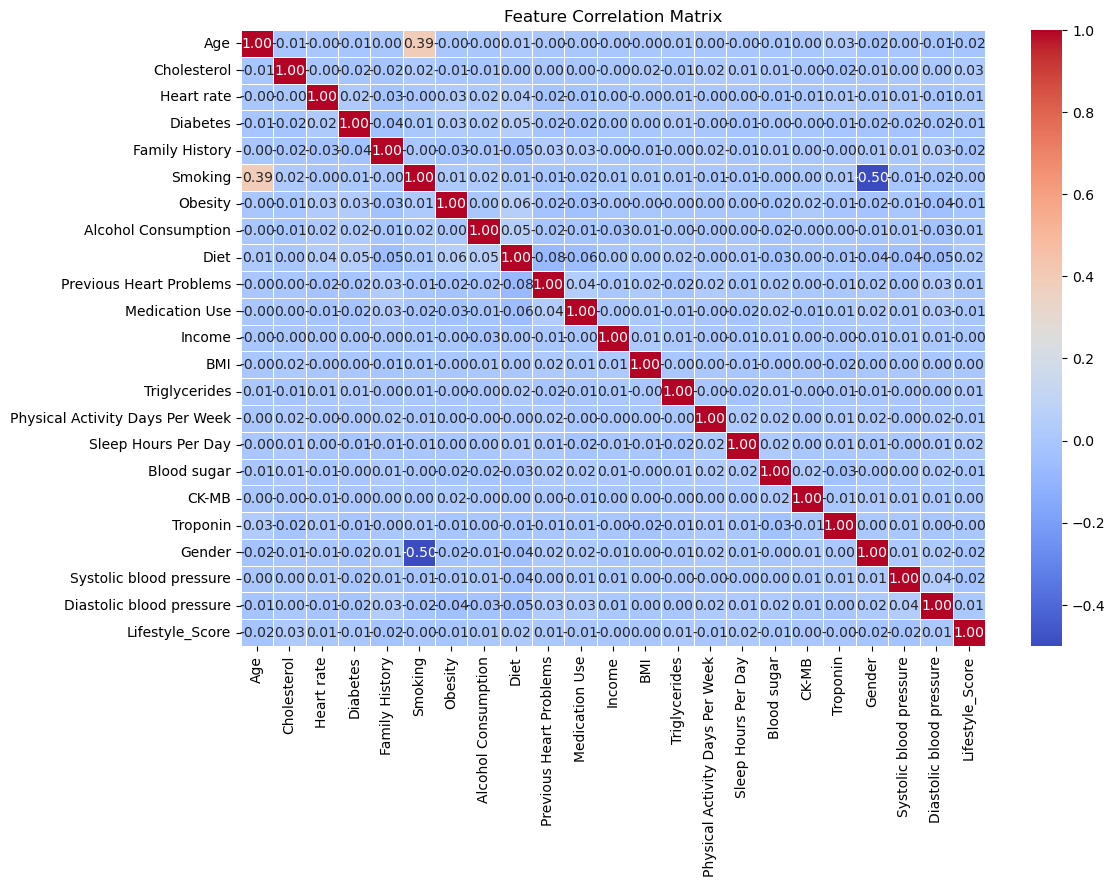

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [81]:
import numpy as np

correlation_value = np.corrcoef(X["Smoking"], X["Gender"])[0, 1]
print(f"Correlation between Smoking and Gender: {correlation_value:.2f}")


Correlation between Smoking and Gender: -0.50


In [82]:
X_reduced = X.drop(columns=["Smoking"])  # Remove Smoking


In [83]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

dtrain_reduced = xgb.DMatrix(X_train_reduced, label=y_train)
dtest_reduced = xgb.DMatrix(X_test_reduced, label=y_test)

xgb_model_reduced = xgb.train(params, dtrain_reduced, num_boost_round=100)

y_pred_reduced = xgb_model_reduced.predict(dtest_reduced)
y_pred_binary_reduced = [1 if prob > 0.5 else 0 for prob in y_pred_reduced]

accuracy_reduced = accuracy_score(y_test, y_pred_binary_reduced)
print(f"Accuracy after removing Smoking: {accuracy_reduced:.4f}")

Accuracy after removing Smoking: 0.6737


/opt/homebrew/Caskroom/miniconda/base/envs/demo_project/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [115]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 7,  # Prevent overfitting
    "learning_rate": 0.4,  # Stable learning
    "n_estimators": 800,  # More boosting rounds for accuracy
    "subsample": 0.8,  # Use 80% of training data per tree
    "colsample_bytree": 0.6,  # Use only 60% of features per tree (avoids dominance of BMI)
    "min_child_weight": 5,  # Prevents overfitting on small patterns
    "alpha": 0.03,  # L1 Regularization (reduces over-reliance on dominant features)
    "lambda": 2,  # L2 Regularization
}

In [116]:
#Testing the model and predicting the results
y_pred = xgb_model.predict(dtest)
# Convert probabilities to binary values (0 or 1)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

In [117]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

XGBoost Model Accuracy: 0.6727
